# Информация о графическом ядре

In [1]:
!nvidia-smi

Sun Nov 21 10:21:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Импортируем все необходимые нам библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycuda.gpuarray as gpuarray
import pycuda.autoinit
import time
import warnings
from pycuda.curandom import rand as curand
warnings.filterwarnings("ignore")

In [3]:
numpy_t = []
numpy_res = []
pycuda_t = []
pycuda_res = []

In [4]:
points = [i * 65536 for i in range(1, 100, 2)]

In [5]:
def DataGeneration(point):
    xg = curand((point,), dtype=np.double) 
    yg = curand((point,), dtype=np.double)
    x = xg.get().astype(np.float)
    y = yg.get().astype(np.float)
    return x, y, point

# Реализация Pi Calc с помощью пакета NumPy

In [6]:
def NumpyPiCalc(x, y, point):
    result = x ** 2 + y ** 2 < 1
    return 4.0/point * result[result == True].shape[0]

# Реализация Pi Calc с помощью PyCuda

In [7]:
def PyCudaPiCalc(x, y, point):
    x = gpuarray.to_gpu(x)
    y = gpuarray.to_gpu(y)
    result = x ** 2 + y ** 2 < 1
    return float((4.0 / point * gpuarray.sum(result)).get())

In [8]:
for point in points:
    x, y, point = DataGeneration(point)
    
    t=time.time()
    numpy_res.append(NumpyPiCalc(x, y, point))
    numpy_t.append(time.time()-t)
    
    t=time.time()
    pycuda_res.append(PyCudaPiCalc(x,y,point))
    pycuda_t.append(time.time()-t)

In [9]:
df = pd.DataFrame(data = {
    'NumPyResult': numpy_res,
    'PyCudaResult': pycuda_res,
    'NumPyTime': numpy_t,
    'PyCudaTime': pycuda_t
}, index=points)

In [10]:
df

,NumPyResult,PyCudaResult,NumPyTime,PyCudaTime
65536,3.136597,3.136597,0.001285,0.611473
196608,3.140361,3.140361,0.002841,0.003556
327680,3.145422,3.145422,0.004298,0.004794
458752,3.141697,3.141697,0.006415,0.005959
589824,3.142029,3.142029,0.007431,0.006932
720896,3.139033,3.139033,0.013522,0.009400
851968,3.141221,3.141221,0.010002,0.009179
983040,3.139254,3.139254,0.011937,0.010585
1114112,3.142718,3.142718,0.014459,0.011501
1245184,3.143391,3.143391,0.017212,0.012678


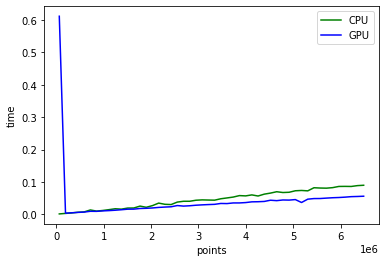

In [13]:
plt.plot(points, numpy_t, color='green', label='CPU')
plt.plot(points, pycuda_t, color='blue', label='GPU')
plt.xlabel('points')
plt.ylabel('time')
plt.legend()
plt.show()